## Moving averages on historical pricing returns
This notebook demonstrates how to use the get_history calls of the Access layer to get data for a a specific stock (AAPL); calculate moving averages, 1-day and 1-month returns and plot the graphs. The Access layer provides a simplified interface designed for FinCoders. 

#### Learn more

To learn more about the Data Library for Python please join the LSEG Developer Community. By [registering](https://developers.lseg.com/iam/register) and [logging](https://developers.lseg.com/content/devportal/en_us/initCookie.html) into the LSEG Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
this [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The LSEG Developer Community will be happy to help. 

----

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
%matplotlib inline

### Open the data session

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x1241535b0 {name='workspace'}>

## Retrieve data

### Price History
This example shows explictly shows how to retrieve end-of-day pricing using the historical API for Apple.

In [3]:
dNow = datetime.now().date()
sdate = dNow - timedelta(days=280)
print(dNow,sdate)

ric = 'AAPL.O'    # S&P 500

# Specify a date range to retrieve the pricing data - default interval: daily
close_price = rd.get_history(
    universe = ric,
    fields = ['TRDPRC_1'],
    start = str(sdate),
    end = str(dNow)
)

close_price.head()

2024-02-16 2023-05-12


AAPL.O,TRDPRC_1
Date,
2023-05-15,172.07
2023-05-16,172.07
2023-05-17,172.69
2023-05-18,175.05
2023-05-19,175.16


### check min max

In [4]:
print('Min: ', close_price.index.min(), ' Max: ', close_price.index.max(), ' Count: ', len(close_price))

Min:  2023-05-15 00:00:00  Max:  2024-02-15 00:00:00  Count:  191


### Moving averages

Calculate two moving averages, one for 20 and one for 50 days.

In [5]:
SMA1 = 20
SMA2 = 50

close_price['SMA20'] = close_price['TRDPRC_1'].rolling(SMA1).mean()
close_price['SMA50'] = close_price['TRDPRC_1'].rolling(SMA2).mean()

close_price.tail()

AAPL.O,TRDPRC_1,SMA20,SMA50
Date,,,
2024-02-09,188.85,189.1510,190.4794
2024-02-12,187.15,189.2125,190.4350
2024-02-13,185.04,189.2830,190.3368
2024-02-14,184.15,189.3565,190.1950
2024-02-15,183.86,189.1180,190.0836


<Axes: title={'center': 'AAPL.O Close Price & SMA crossover'}, xlabel='Date'>

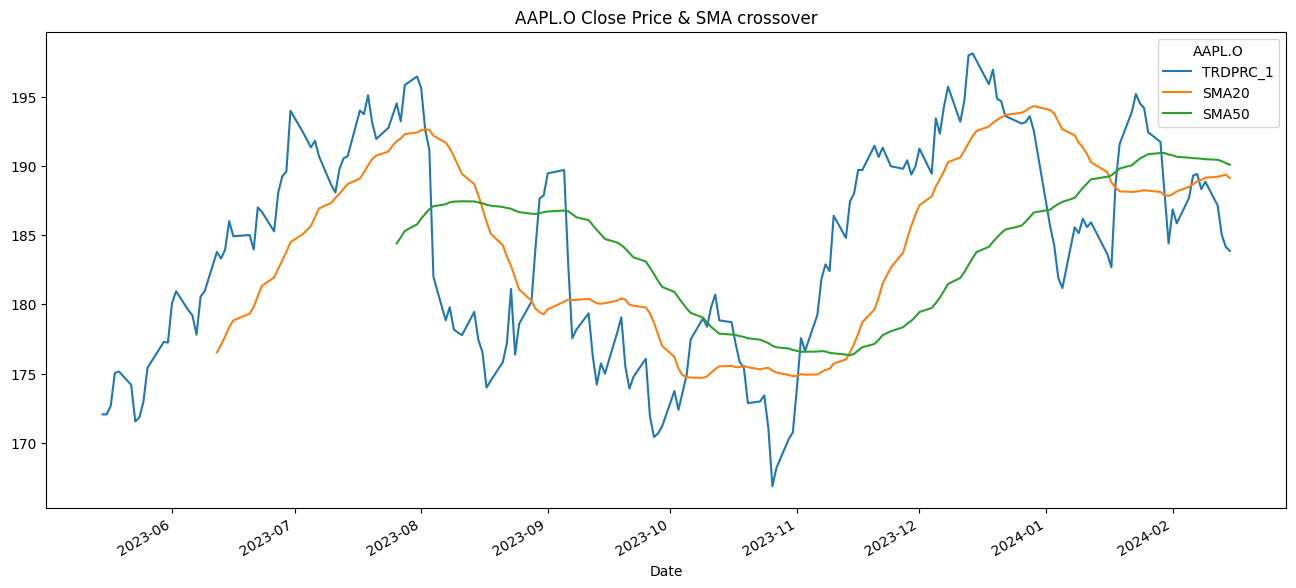

In [6]:
close_price.plot(title= ric + ' Close Price & SMA crossover',figsize=(16, 7))

Calculate 1 day and 1 month returns

In [7]:
close_price['1DReturns'] = close_price['TRDPRC_1'].pct_change(1)
close_price['1MReturns'] = close_price['TRDPRC_1'].pct_change(21)
close_price.tail()

AAPL.O,TRDPRC_1,SMA20,SMA50,1DReturns,1MReturns
Date,,,,,
2024-02-09,188.85,189.1510,190.4794,0.002814,0.014286
2024-02-12,187.15,189.2125,190.4350,-0.009002,0.008406
2024-02-13,185.04,189.2830,190.3368,-0.011274,-0.004733
2024-02-14,184.15,189.3565,190.1950,-0.00481,0.002832
2024-02-15,183.86,189.1180,190.0836,-0.001575,0.006459


<Axes: title={'center': '1 day Returns'}, xlabel='Date'>

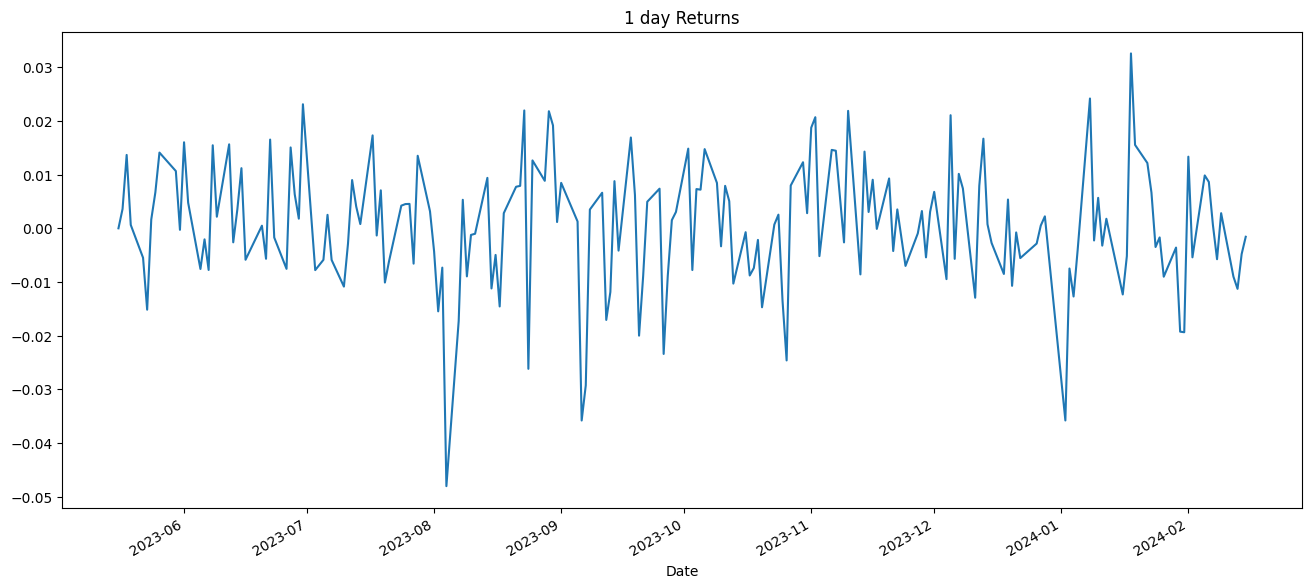

In [8]:
close_price['1DReturns'].plot(figsize = (16,7), title = "1 day Returns")

<Axes: title={'center': '1 month Returns'}, xlabel='Date'>

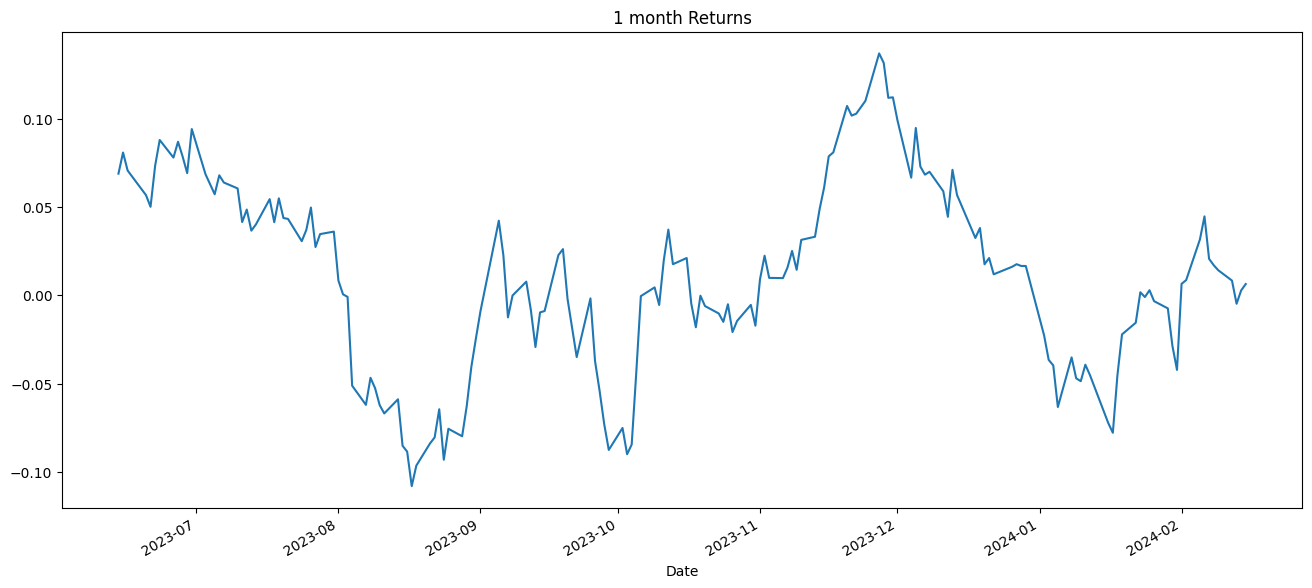

In [9]:
close_price['1MReturns'].plot(figsize = (16,7), title = "1 month Returns")

### Close the session

In [10]:
rd.close_session()